In [ ]:
%pip install torch==2.4.1
%pip install torchvision==0.19.1
%pip install torchaudio==2.4.1
%pip install --upgrade numpy==2.1.2
%pip install matplotlib

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 确保使用 CPU 运行
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
# 1. 数据预处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
# 2. 加载数据集
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [5]:
# 3. 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
# 4. 创建模型、损失函数和优化器
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
def train_model(model, trainloader, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)  # 确保数据在 CPU 上
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

train_model(model, trainloader)

Epoch 1, Loss: 0.3489
Epoch 2, Loss: 0.1669
Epoch 3, Loss: 0.1276
Epoch 4, Loss: 0.1057
Epoch 5, Loss: 0.0890
Epoch 6, Loss: 0.0818
Epoch 7, Loss: 0.0723
Epoch 8, Loss: 0.0644
Epoch 9, Loss: 0.0627
Epoch 10, Loss: 0.0559


In [8]:
# 6. 评估模型
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)  # 确保数据在 CPU 上
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'测试集准确率: {correct / total:.4f}')

evaluate_model(model, testloader)

测试集准确率: 0.9739


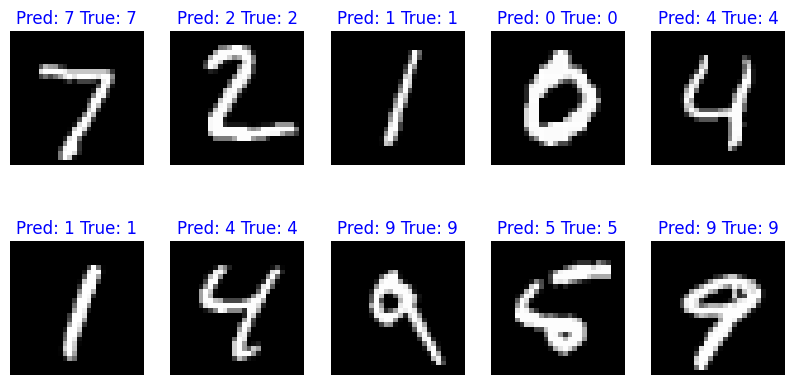

In [10]:
# 7. 可视化预测结果
def plot_predictions(model, testloader):
    model.eval()
    images, labels = next(iter(testloader))
    images, labels = images.to(device), labels.to(device)  # 确保数据在 CPU 上

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        img = images[i].cpu().squeeze().numpy()  # 转换为 CPU 数据
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Pred: {predicted[i].item()} True: {labels[i].item()}',
                     color='blue' if predicted[i] == labels[i] else 'red')
        ax.axis('off')
    plt.show()

plot_predictions(model, testloader)